# Exploratory Data Analysis

### Retrieve Data from Postgres DB

In [ ]:
import psycopg2
from psycopg2 import Error
import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
def create_connection(host, port, user, pwd, database):

    '''
    Creates a connection to SQL postgres db.
    
    Accepts:
        host (str)
        port (int),
        user (str)
        pwd (str)
        database (str
    
    Returns a cursor object. If an error is raised during connection,
    nothing is returned and the error will print to console.
    '''
    
    try:
        # Establish connection parameters
        connection = psycopg2.connect(user=user,
                                  password=pwd,
                                  host=host,
                                  port=port,
                                  database=database)
        # Create a cursor to perform database operations
        cursor = connection.cursor()
        # Print PostgreSQL details
        print("PostgreSQL server information")
        print(connection.get_dsn_parameters(), "\n")
        # Executing a SQL query to find version info
        cursor.execute("SELECT version();")
        # Fetch and print result
        record = cursor.fetchone()
        print("You are connected to - ", record, "\n")
        # reurns cursor object
        return cursor
    
    # If an error is raised, print details
    except (Exception, Error) as error:
        print("Error while connecting to PostgreSQL", error)

In [ ]:
def overview(table, cursor):
    
    '''
    Prints basic information about PostGRE SQL table to console.
    Accepts:
        table (str)
        cursor (cursor object)
    Returns first five rows of the table as pandas dataframe.
    '''
    
    # print table name
    print(f'TABLE: {table}')
    
    # count and print rowcount
    entries_count = execute(f'SELECT COUNT(*) FROM {table}', cursor)
    print(f'# of entries: {entries_count}')
    
    # query and print dtypes
    dtypes = execute(f"""SELECT COLUMN_NAME, DATA_TYPE 
                    FROM INFORMATION_SCHEMA.COLUMNS 
                    WHERE TABLE_NAME = '{table}'
                    """, cursor)
    print(f'column names and dtypes: {dtypes}')
    
    # get column names for next step
    columns = []
    for item in dtypes:
        columns.append(item[0])
    
    # query and return first five rows
    head = execute(f'SELECT * FROM {table} LIMIT 5', cursor)
    df = pd.DataFrame(head, columns = columns)
    return df

In [ ]:
def execute(query, cursor):
    
    '''
    Executes query to active cursor. 
    Accepts:
        query (str)
        cursor (cursor object)
    Returns the result of the query.
    '''
    
    cursor.execute(query)
    record = cursor.fetchall()
    return record

In [ ]:
def get_df(query, table, cursor):
  # get column names for next step
    columns_ret = execute(f"""SELECT COLUMN_NAME 
                    FROM INFORMATION_SCHEMA.COLUMNS 
                    WHERE TABLE_NAME = '{table}'
                    """, cursor)
    columns = []
    for column in columns_ret:
      columns.append(column[0])
    
    # query and return first five rows
    head = execute(query, cursor)
    df = pd.DataFrame(head, columns = columns)
    return df

In [ ]:
# connect to PostGRE SQL db

cursor = create_connection('mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com', 5432, 'lhl_student', 'lhl_student', 'mid_term_project')

PostgreSQL server information
{'user': 'lhl_student', 'dbname': 'mid_term_project', 'host': 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 11.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.3 20140911 (Red Hat 4.8.3-9), 64-bit',) 



### Explore Tables

In [ ]:
# fuel_consumption table
overview('fuel_comsumption', cursor)

TABLE: fuel_comsumption
# of entries: [(3035,)]
column names and dtypes: [('month', 'bigint'), ('airline_id', 'double precision'), ('unique_carrier', 'text'), ('carrier', 'text'), ('carrier_name', 'text'), ('carrier_group_new', 'bigint'), ('sdomt_gallons', 'double precision'), ('satl_gallons', 'double precision'), ('spac_gallons', 'double precision'), ('slat_gallons', 'double precision'), ('sint_gallons', 'double precision'), ('ts_gallons', 'double precision'), ('tdomt_gallons', 'double precision'), ('tint_gallons', 'double precision'), ('total_gallons', 'double precision'), ('sdomt_cost', 'double precision'), ('satl_cost', 'double precision'), ('spac_cost', 'double precision'), ('slat_cost', 'double precision'), ('sint_cost', 'double precision'), ('ts_cost', 'double precision'), ('tdomt_cost', 'double precision'), ('tint_cost', 'double precision'), ('total_cost', 'double precision'), ('year', 'bigint')]


,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,None,0JQ,None,1,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,0.0,0.0,163052.0,47060.0,210112.0,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,0.0,260848.0,284362.0,0.0,284362.0,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016


In [ ]:
# passengers table
overview('passengers', cursor)

TABLE: passengers
# of entries: [(2350497,)]
column names and dtypes: [('departures_scheduled', 'double precision'), ('departures_performed', 'double precision'), ('payload', 'double precision'), ('seats', 'double precision'), ('passengers', 'double precision'), ('freight', 'double precision'), ('mail', 'double precision'), ('distance', 'double precision'), ('ramp_to_ramp', 'double precision'), ('air_time', 'double precision'), ('unique_carrier', 'text'), ('airline_id', 'bigint'), ('unique_carrier_name', 'text'), ('region', 'text'), ('carrier', 'text'), ('carrier_name', 'text'), ('carrier_group', 'bigint'), ('carrier_group_new', 'bigint'), ('origin_airport_id', 'bigint'), ('origin_city_market_id', 'bigint'), ('origin', 'text'), ('origin_city_name', 'text'), ('origin_country', 'text'), ('origin_country_name', 'text'), ('dest_airport_id', 'bigint'), ('dest_city_market_id', 'bigint'), ('dest', 'text'), ('dest_city_name', 'text'), ('dest_country', 'text'), ('dest_country_name', 'text'), ('

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,unique_carrier,airline_id,unique_carrier_name,region,carrier,carrier_name,carrier_group,carrier_group_new,origin_airport_id,origin_city_market_id,origin,origin_city_name,origin_country,origin_country_name,dest_airport_id,dest_city_market_id,dest,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,1.0,1.0,17600.0,65.0,21.0,0.0,0.0,414.0,104.0,66.0,OH,20397,PSA Airlines Inc.,D,OH,PSA Airlines Inc.,2,2,11612,31612,EVV,"Evansville, IN",US,United States,11057,31057,CLT,"Charlotte, NC",US,United States,6,631,1,2018,8,1,F,DU
1,1.0,1.0,22500.0,76.0,39.0,0.0,0.0,414.0,83.0,60.0,OH,20397,PSA Airlines Inc.,D,OH,PSA Airlines Inc.,2,2,11612,31612,EVV,"Evansville, IN",US,United States,11057,31057,CLT,"Charlotte, NC",US,United States,6,638,1,2018,8,1,F,DU
2,1.0,1.0,12240.0,50.0,47.0,0.0,0.0,221.0,58.0,43.0,OH,20397,PSA Airlines Inc.,D,OH,PSA Airlines Inc.,2,2,11617,31617,EWN,"New Bern/Morehead/Beaufort, NC",US,United States,11057,31057,CLT,"Charlotte, NC",US,United States,6,629,1,2018,8,1,F,DU
3,1.0,1.0,17600.0,63.0,35.0,0.0,0.0,178.0,126.0,99.0,OH,20397,PSA Airlines Inc.,D,OH,PSA Airlines Inc.,2,2,11617,31617,EWN,"New Bern/Morehead/Beaufort, NC",US,United States,11995,31995,GSO,"Greensboro/High Point, NC",US,United States,6,631,1,2018,8,1,F,DU
4,1.0,1.0,22500.0,76.0,12.0,0.0,0.0,99.0,64.0,28.0,OH,20397,PSA Airlines Inc.,D,OH,PSA Airlines Inc.,2,2,11699,31699,FLO,"Florence, SC",US,United States,11057,31057,CLT,"Charlotte, NC",US,United States,6,638,1,2018,8,1,F,DU


In [ ]:
# fuel_consumption table
overview('flights_test', cursor)

TABLE: flights_test
# of entries: [(660556,)]
column names and dtypes: [('fl_date', 'timestamp without time zone'), ('mkt_unique_carrier', 'text'), ('branded_code_share', 'text'), ('mkt_carrier', 'text'), ('mkt_carrier_fl_num', 'bigint'), ('op_unique_carrier', 'text'), ('tail_num', 'text'), ('op_carrier_fl_num', 'bigint'), ('origin_airport_id', 'bigint'), ('origin', 'text'), ('origin_city_name', 'text'), ('dest_airport_id', 'bigint'), ('dest', 'text'), ('dest_city_name', 'text'), ('crs_dep_time', 'bigint'), ('crs_arr_time', 'bigint'), ('dup', 'text'), ('crs_elapsed_time', 'bigint'), ('flights', 'bigint'), ('distance', 'bigint')]


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333


In [ ]:
# flights table
overview('flights', cursor)

TABLE: flights
# of entries: [(15927485,)]
column names and dtypes: [('fl_date', 'text'), ('mkt_unique_carrier', 'text'), ('branded_code_share', 'text'), ('mkt_carrier', 'text'), ('mkt_carrier_fl_num', 'integer'), ('op_unique_carrier', 'text'), ('tail_num', 'text'), ('op_carrier_fl_num', 'integer'), ('origin_airport_id', 'integer'), ('origin', 'text'), ('origin_city_name', 'text'), ('dest_airport_id', 'integer'), ('dest', 'text'), ('dest_city_name', 'text'), ('crs_dep_time', 'integer'), ('dep_time', 'double precision'), ('dep_delay', 'double precision'), ('taxi_out', 'double precision'), ('wheels_off', 'double precision'), ('wheels_on', 'double precision'), ('taxi_in', 'double precision'), ('crs_arr_time', 'integer'), ('arr_time', 'double precision'), ('arr_delay', 'double precision'), ('cancelled', 'double precision'), ('cancellation_code', 'text'), ('diverted', 'double precision'), ('dup', 'text'), ('crs_elapsed_time', 'double precision'), ('actual_elapsed_time', 'double precision'),

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-01,WN,WN,WN,20,WN,N766SW,20,11292,DEN,"Denver, CO",12339,IND,"Indianapolis, IN",1605,1651.0,46.0,10.0,1701.0,2049.0,4.0,2015,2053.0,38.0,0.0,None,0.0,N,130.0,122.0,108.0,1.0,977.0,12.0,0.0,0.0,0.0,26.0,None,None,None,None
1,2019-01-01,WN,WN,WN,677,WN,N709SW,677,11292,DEN,"Denver, CO",12339,IND,"Indianapolis, IN",2010,2033.0,23.0,8.0,2041.0,26.0,4.0,25,30.0,5.0,0.0,None,0.0,N,135.0,117.0,105.0,1.0,977.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
2,2019-01-01,WN,WN,WN,2074,WN,N8678E,2074,11292,DEN,"Denver, CO",12339,IND,"Indianapolis, IN",1220,1323.0,63.0,10.0,1333.0,1717.0,4.0,1640,1721.0,41.0,0.0,None,0.0,N,140.0,118.0,104.0,1.0,977.0,41.0,0.0,0.0,0.0,0.0,None,None,None,None
3,2019-01-01,WN,WN,WN,2145,WN,N8308K,2145,11292,DEN,"Denver, CO",12339,IND,"Indianapolis, IN",1030,1050.0,20.0,12.0,1102.0,1448.0,4.0,1450,1452.0,2.0,0.0,None,0.0,N,140.0,122.0,106.0,1.0,977.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
4,2019-01-01,WN,WN,WN,2491,WN,N289CT,2491,11292,DEN,"Denver, CO",12451,JAX,"Jacksonville, FL",1415,1515.0,60.0,30.0,1545.0,2027.0,4.0,1920,2031.0,71.0,0.0,None,0.0,N,185.0,196.0,162.0,1.0,1447.0,58.0,0.0,11.0,0.0,2.0,None,None,None,None


### Retrieve Flights 2019-01-01 to 2019-01-07

---



In [ ]:
df = get_df("SELECT * FROM flights WHERE fl_date >= '2019-01-01' AND fl_date <= '2019-01-07'", 'flights', cursor)

In [ ]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-01,WN,WN,WN,20,WN,N766SW,20,11292,DEN,"Denver, CO",12339,IND,"Indianapolis, IN",1605,1651.0,46.0,10.0,1701.0,2049.0,4.0,2015,2053.0,38.0,0.0,None,0.0,N,130.0,122.0,108.0,1.0,977.0,12.0,0.0,0.0,0.0,26.0,None,NaN,NaN,None
1,2019-01-01,WN,WN,WN,677,WN,N709SW,677,11292,DEN,"Denver, CO",12339,IND,"Indianapolis, IN",2010,2033.0,23.0,8.0,2041.0,26.0,4.0,25,30.0,5.0,0.0,None,0.0,N,135.0,117.0,105.0,1.0,977.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-01-01,WN,WN,WN,2074,WN,N8678E,2074,11292,DEN,"Denver, CO",12339,IND,"Indianapolis, IN",1220,1323.0,63.0,10.0,1333.0,1717.0,4.0,1640,1721.0,41.0,0.0,None,0.0,N,140.0,118.0,104.0,1.0,977.0,41.0,0.0,0.0,0.0,0.0,None,NaN,NaN,None
3,2019-01-01,WN,WN,WN,2145,WN,N8308K,2145,11292,DEN,"Denver, CO",12339,IND,"Indianapolis, IN",1030,1050.0,20.0,12.0,1102.0,1448.0,4.0,1450,1452.0,2.0,0.0,None,0.0,N,140.0,122.0,106.0,1.0,977.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2019-01-01,WN,WN,WN,2491,WN,N289CT,2491,11292,DEN,"Denver, CO",12451,JAX,"Jacksonville, FL",1415,1515.0,60.0,30.0,1545.0,2027.0,4.0,1920,2031.0,71.0,0.0,None,0.0,N,185.0,196.0,162.0,1.0,1447.0,58.0,0.0,11.0,0.0,2.0,None,NaN,NaN,None


In [ ]:
df.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total_add_gtime,longest_add_gtime
count,146485.000000,146485.000000,146485.000000,146485.000000,146485.000000,145408.000000,145408.000000,145379.000000,145379.000000,145303.000000,145303.000000,146485.000000,145303.000000,145053.000000,146485.000000,146485.000000,146485.000000,145053.000000,145053.000000,146485.0,146485.000000,27312.000000,27312.000000,27312.000000,27312.000000,27312.000000,844.000000,844.000000
mean,2758.580940,2758.619845,12704.697983,12704.644482,1334.383814,1340.467148,9.503115,17.551558,1364.764691,1474.275211,7.756061,1496.187180,1479.367873,3.241201,0.007653,0.002123,142.302461,136.228296,110.929612,1.0,790.531795,20.755199,2.326633,12.952475,0.127893,25.125659,31.889810,31.415877
std,1883.845292,1884.070757,1518.390743,1518.507308,490.953942,501.854620,45.626410,9.461433,502.705038,528.843389,6.242052,516.932669,532.999162,47.969853,0.087144,0.046028,73.898536,73.049246,71.247083,0.0,596.953941,64.621413,26.660100,30.758404,2.442786,53.138748,25.095943,23.553302
min,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,-47.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-76.000000,0.000000,0.000000,20.000000,19.000000,9.000000,1.0,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1130.000000,1130.000000,11292.000000,11292.000000,922.000000,925.000000,-5.000000,11.000000,939.000000,1054.000000,4.000000,1109.000000,1058.000000,-16.000000,0.000000,0.000000,89.000000,83.000000,59.000000,1.0,349.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,16.000000
50%,2318.000000,2318.000000,12889.000000,12889.000000,1328.000000,1336.000000,-2.000000,15.000000,1349.000000,1511.000000,6.000000,1521.000000,1515.000000,-6.000000,0.000000,0.000000,124.000000,118.000000,92.000000,1.0,628.000000,2.000000,0.000000,2.000000,0.000000,4.000000,26.000000,26.000000
75%,4355.000000,4355.000000,14057.000000,14057.000000,1739.000000,1745.000000,7.000000,21.000000,1801.000000,1915.000000,9.000000,1924.000000,1921.000000,8.000000,0.000000,0.000000,173.000000,167.000000,141.000000,1.0,1029.000000,18.000000,0.000000,18.000000,0.000000,30.000000,40.000000,39.000000
max,9401.000000,9401.000000,16218.000000,16218.000000,2359.000000,2400.000000,1690.000000,166.000000,2400.000000,2400.000000,120.000000,2400.000000,2400.000000,1707.000000,1.000000,1.000000,703.000000,714.000000,691.000000,1.0,4983.000000,1638.000000,1390.000000,1447.000000,158.000000,1437.000000,295.000000,173.000000


In [ ]:
df.shape

(146485, 42)

In [ ]:
df.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
cancellation_code       object
diverted               float64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance

### Explore Target Variable

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


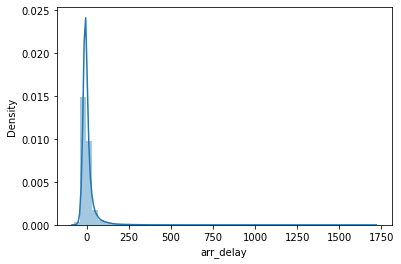

In [ ]:
sns.distplot(df['arr_delay'])

### Numerical Variables

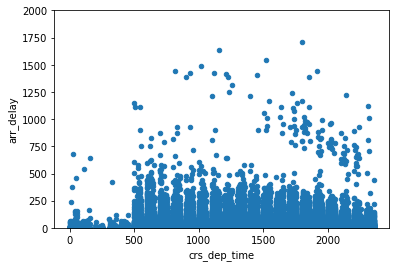

In [ ]:
#scatter plot crs_dep_time vs. arr_delay
var = 'crs_dep_time'
data = df[['arr_delay',var]]
data.plot.scatter(x=var, y='arr_delay', ylim=(0,2000))

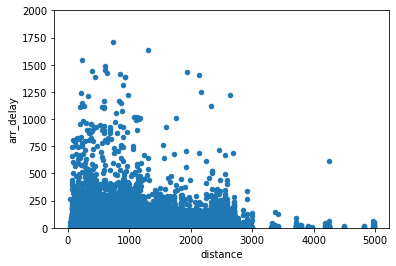

In [ ]:
#scatter plot distance vs. arr_delay
var = 'distance'
data = df[['arr_delay',var]]
data.plot.scatter(x=var, y='arr_delay', ylim=(0,2000))

### Categorical Variables

(-0.5, 25.5, 0.0, 500.0)

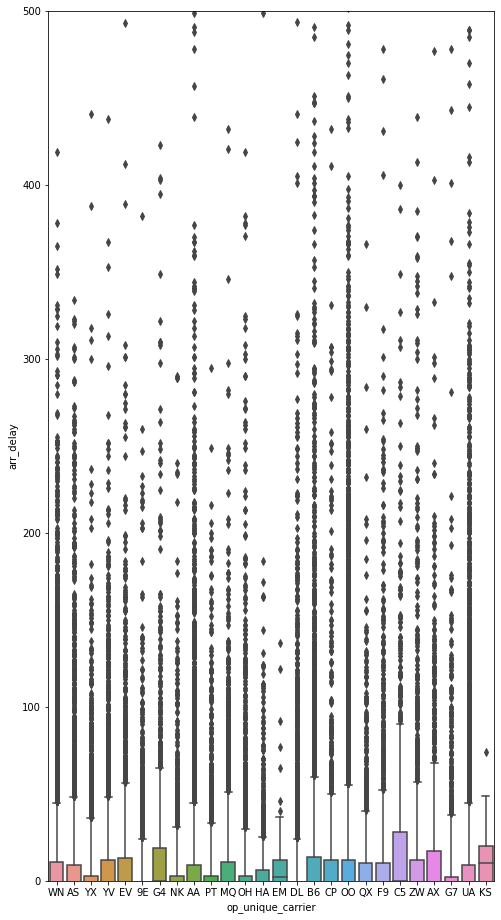

In [ ]:
var = 'op_unique_carrier'
data = df[['arr_delay',var]]
f, ax = plt.subplots(figsize=(8, 16))
fig = sns.boxplot(x=var, y="arr_delay", data=data)
fig.axis(ymin=0, ymax=500)

(-0.5, 359.5, 0.0, 500.0)

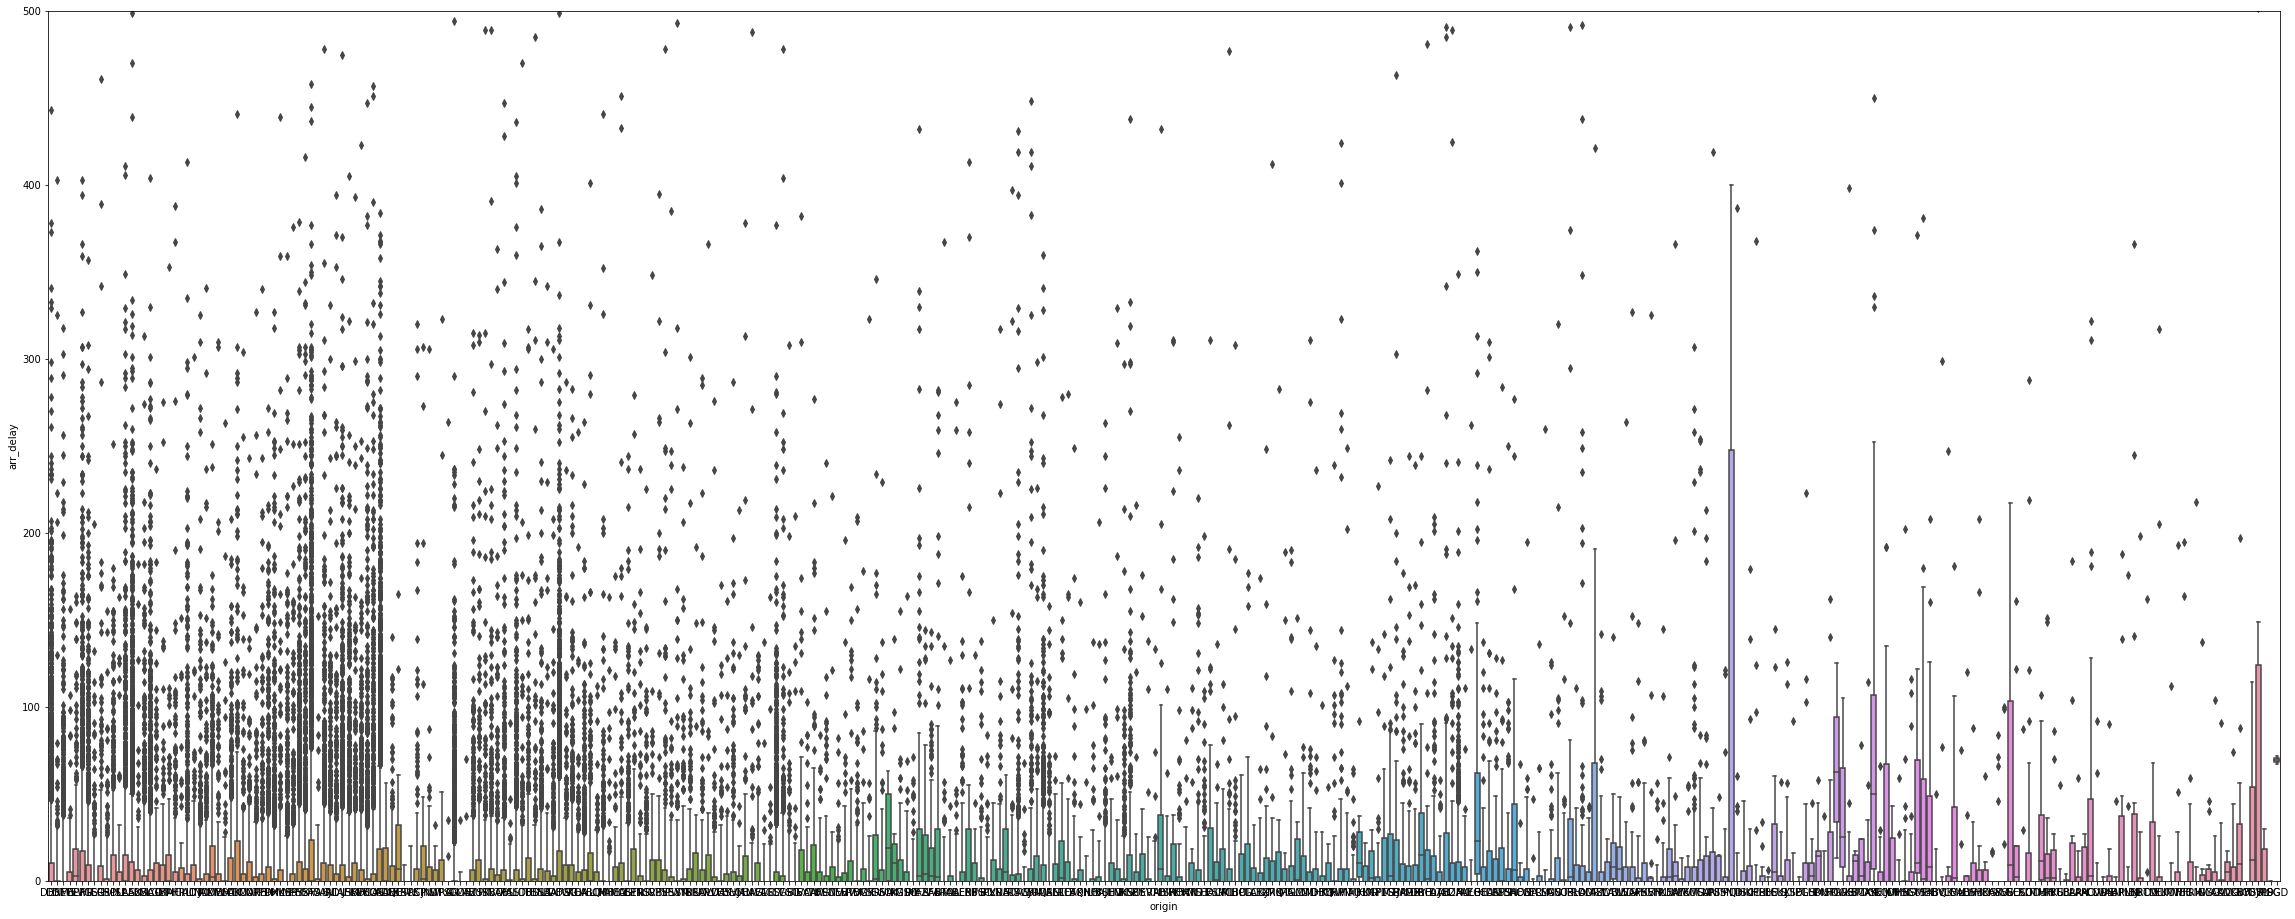

In [ ]:
var = 'origin'
data = df[['arr_delay',var]]
f, ax = plt.subplots(figsize=(40, 16))
fig = sns.boxplot(x=var, y="arr_delay", data=data)
fig.axis(ymin=0, ymax=500)

(-0.5, 359.5, 0.0, 500.0)

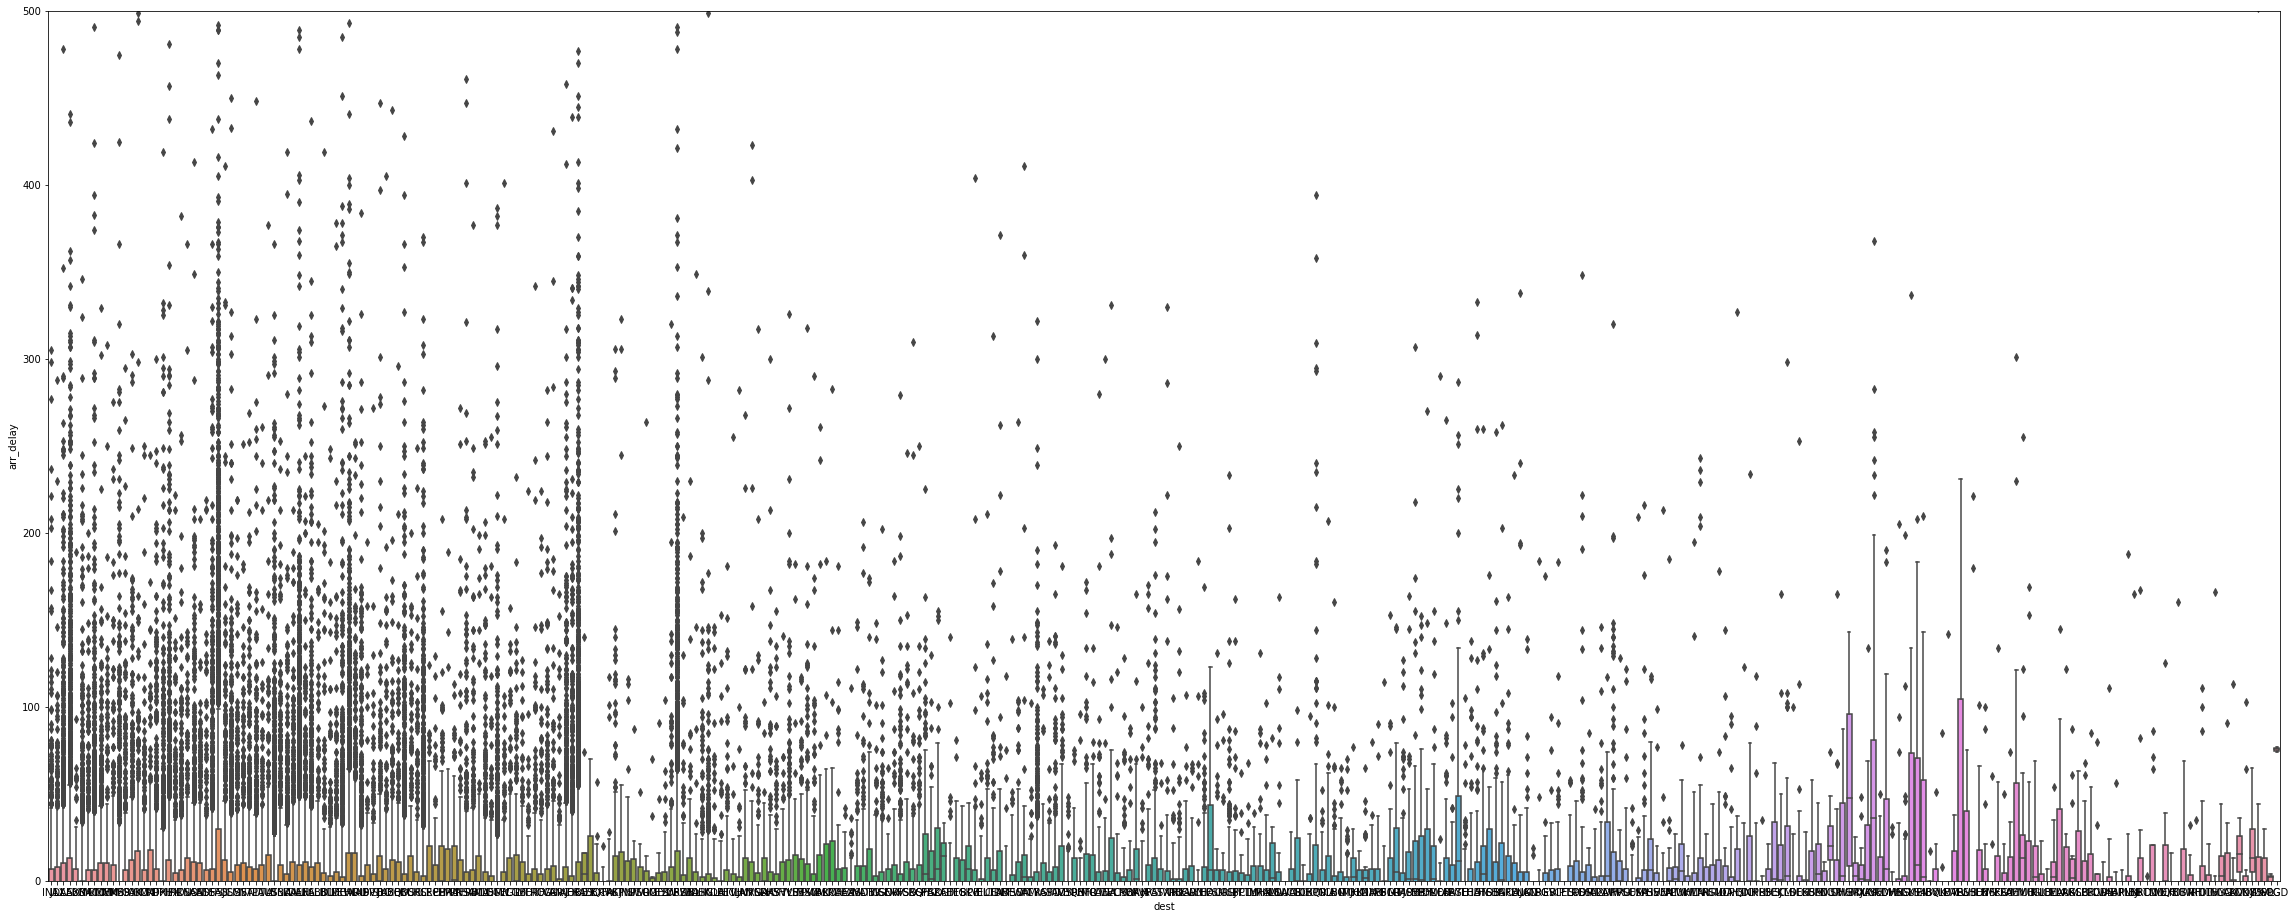

In [ ]:
var = 'dest'
data = df[['arr_delay',var]]
f, ax = plt.subplots(figsize=(40, 16))
fig = sns.boxplot(x=var, y="arr_delay", data=data)
fig.axis(ymin=0, ymax=500)

In [ ]:
var = 'fl_date'
data = df[['arr_delay',var]]
f, ax = plt.subplots(figsize=(40, 16))
fig = sns.boxplot(x=var, y="arr_delay", data=data)
fig.axis(ymin=0, ymax=500)

AttributeError: ignored

### Multivariate Analysis

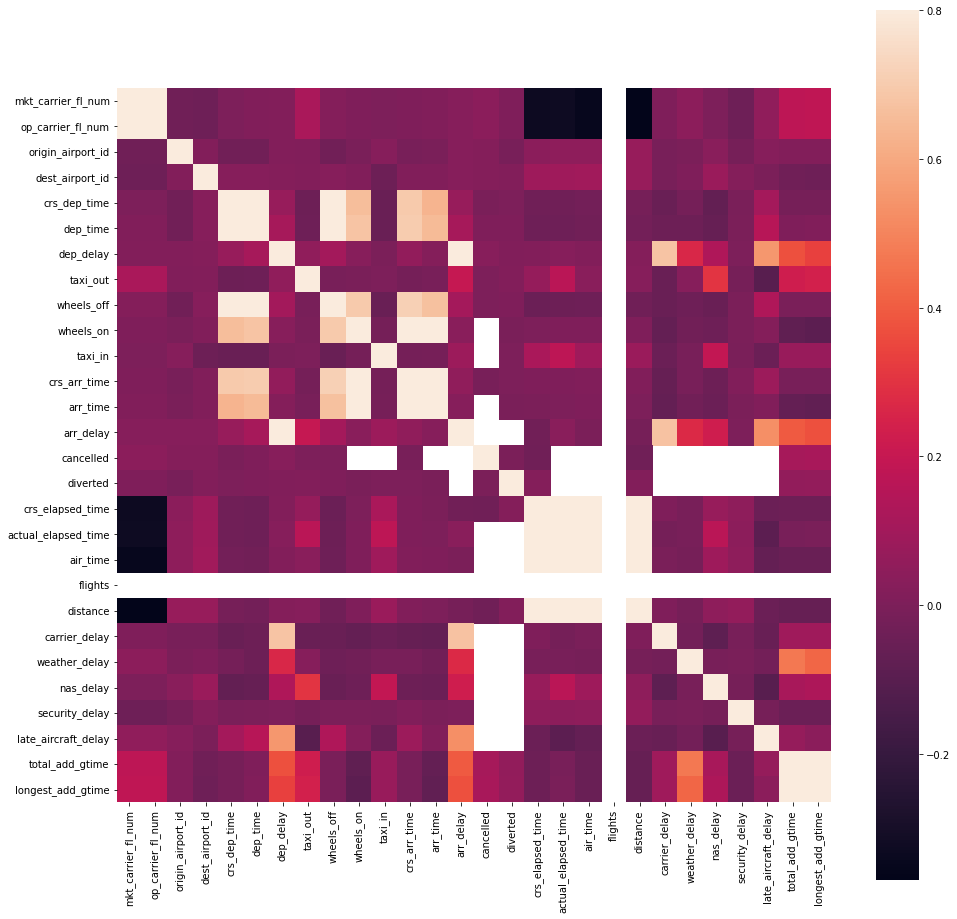

In [ ]:
#correlation matrix
corr = df.corr()
f, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corr, vmax=.8, square=True)

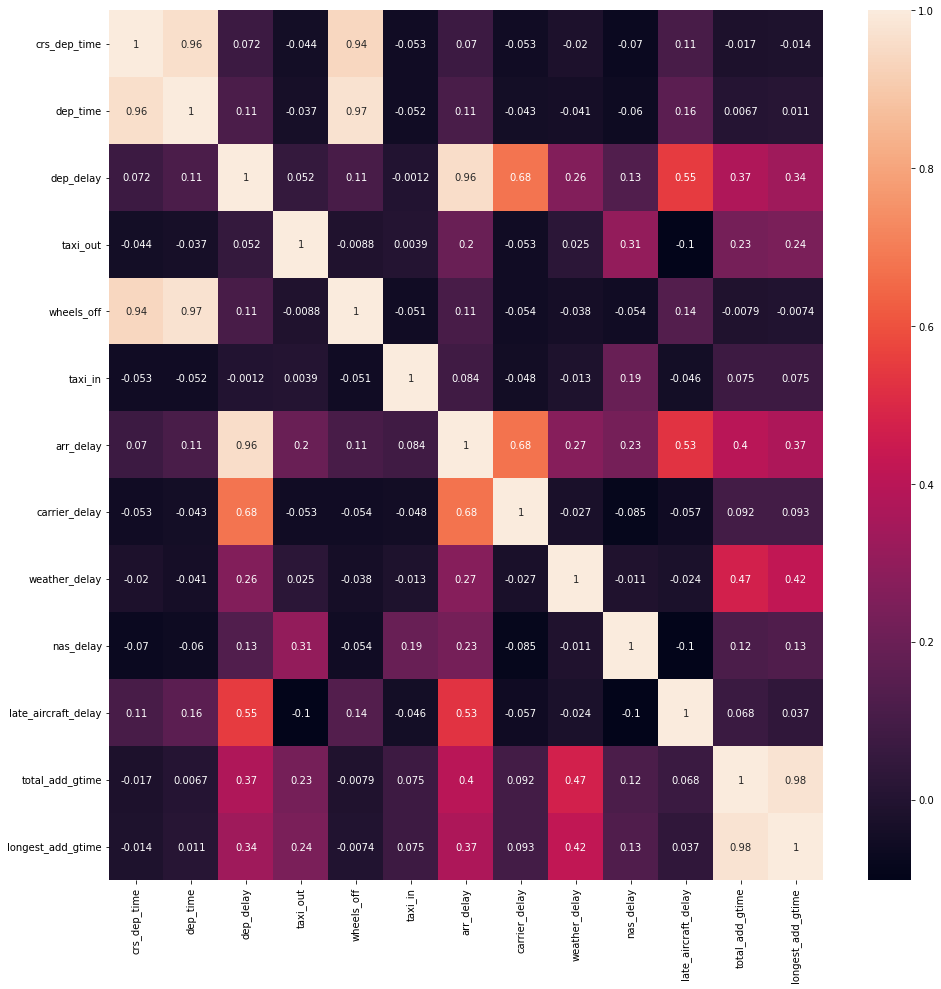

In [ ]:
# Features with >0.07 pearsons' correlation coefficient to arr_delay

top_corr_features = corr.index[abs(corr["arr_delay"])>0.07]
plt.figure(figsize=(16,16))
g = sns.heatmap(df[top_corr_features].corr(),annot=True)

In [ ]:
# Top 10 correlated features

df[df.columns[1:]].corr()['arr_delay'].nlargest(10)

arr_delay              1.000000
dep_delay              0.957336
carrier_delay          0.676556
late_aircraft_delay    0.530025
total_add_gtime        0.397326
longest_add_gtime      0.370630
weather_delay          0.270424
nas_delay              0.226399
taxi_out               0.197323
dep_time               0.110748
Name: arr_delay, dtype: float64

### Questions

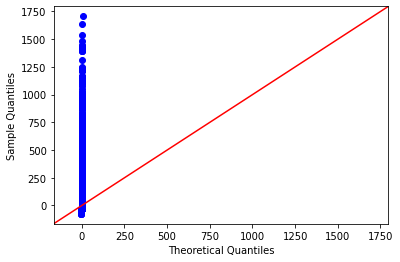

In [ ]:
# The target variable is not normally distributed - could expand on this a bit

import pylab as py
import statsmodels.api as sm

fig = sm.qqplot(df.arr_delay.dropna(), line='45')
plt.show()